This notebook is utilized for show the detection of faces and facial landmarks

First, imports the libraries:

```Python
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img
```

In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

Second, load one image with people.

In [2]:
image = cv2.imread('./Gabriel Lima/18.jpeg')

Visualize the image with plt.imshow()

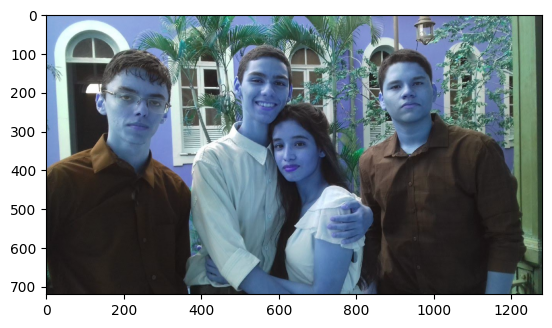

In [3]:
plt.imshow(image, cmap="gray")

Convert the image to grayscale and store it in another variable

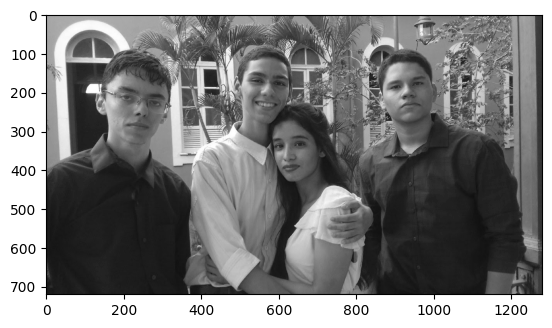

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap="gray")

Load the classifier haarcascade_frontalface_default.xml with the code `classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")`

In [5]:
classifier = cv2.CascadeClassifier("./classificadores/haarcascade_frontalface_default.xml")

Detecter the faces with method `detectMultiScale(imagem_gray, 1.3, 10)` of `classifier` and store in variable faces.

In [6]:
faces = classifier.detectMultiScale(image_gray, 1.3, 10)

View the number of faces with `len(faces)`

In [7]:
len(faces)

3

Make one copy of image

In [8]:
image_copy = image.copy()

Draw the rectangles on the face with the code:
```Python
for (x,y,w,h) in faces:
    cv2.rectangle(imga, (x,y), (x+w, y+h), (255, 255, 0), 2)
```

In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(image_copy, (x,y), (x+w, y+h), (0, 255, 255), 2)

Visualize the image.

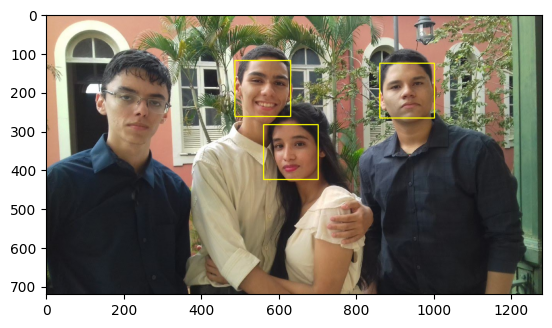

In [10]:
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

Save the faces in separate files
```Python
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)
```

In [11]:
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    image_roi = image_copy[y:y+h, x:x+w]
    # image_roi = cv2.cvtColor(image_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", image_roi)

Use a classifier from the dlib library
```Python
classificador_dlib_68_path = "shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()
```

In [12]:
classifier_dlib_68_path = './classificadores/shape_predictor_68_face_landmarks.dat'
classifier_dlib = dlib.shape_predictor(classifier_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

Build the function annotate face
```Python
def annotate_face(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem
```

In [13]:
def annotate_face(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (0, 255, 255), 2)
    
    return imagem

Apply the function

In [14]:
image2_copy = image.copy()
images2 = annotate_face(image2_copy)

Identificado rosto 0
Identificado rosto 1
Identificado rosto 2
Identificado rosto 3


Visualize the annotate image:

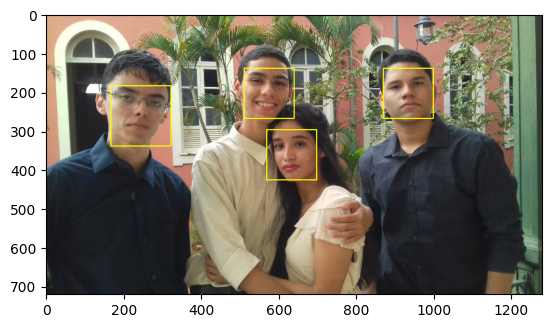

In [15]:
plt.imshow(cv2.cvtColor(images2, cv2.COLOR_BGR2RGB))

Get the facial points with the method:

```Python
def face_landmark(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos
```

In [16]:
def face_landmark(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classifier_dlib(imagem,ret).parts()]))
    
    return marcos

Load a image with face of one person

In [17]:
image3 = cv2.imread('./Gabriel Lima/11.jpeg')

Visualize the image

In [18]:
def cvt2RGB(i):
    return cv2.cvtColor(i, cv2.COLOR_BGR2RGB)

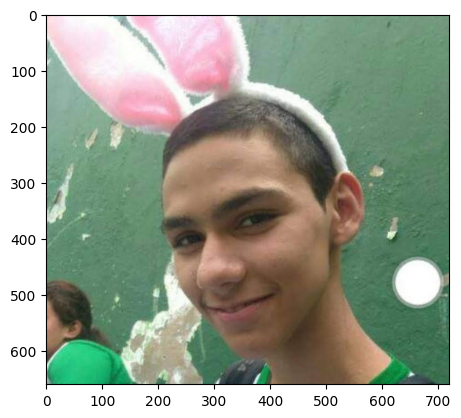

In [19]:
plt.imshow(cvt2RGB(image3))

Use the function that marks facial points

In [20]:
faces3 = face_landmark(image3)

Apply the facial points
```Python
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    
    return imagem
```

In [21]:
def anotar_marcos_faciais(imagem, marcos):
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    return imagem

In [22]:
def showImg(image):
    plt.imshow(image)

In [23]:
images3_detected = anotar_marcos_faciais(image3, faces3)

Visualize the image

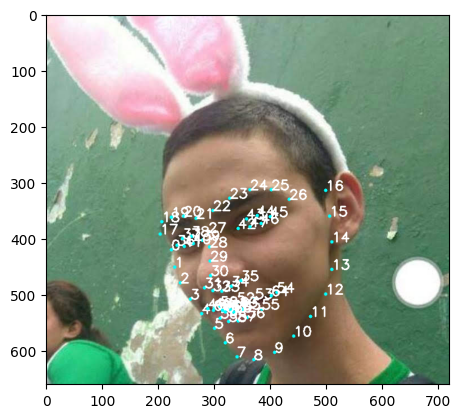

In [24]:
showImg(cvt2RGB(images3_detected))

Separation of facial points
```Python
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))
```

In [25]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))

# Abertura do olhos

Use the following method to determine the eye opening:
```Python
def aspecto_razao_olhos(pontos_olhos_in):
    pontos_olhos = np.array(pontos_olhos_in)
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao
```

In [26]:
def aspecto_razao_olhos(pontos_olhos_in):
    pontos_olhos = np.array(pontos_olhos_in)
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao

Upload an image of a smiling person

In [27]:
image4 = cv2.imread('./Gabriel Lima/11.jpeg')
marcos4 = face_landmark(image4)

Visualize the image

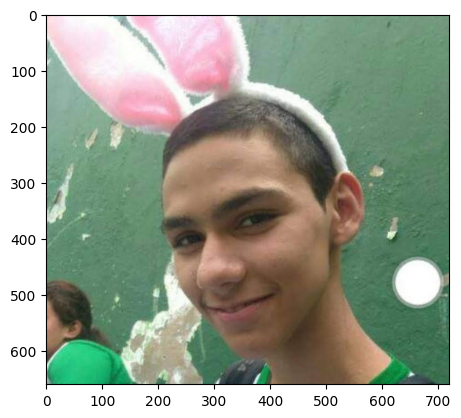

In [28]:
showImg(cvt2RGB(image4))

Obtenha os pontos faciais

In [29]:
eyes_points = aspecto_razao_olhos(OLHO_DIREITO + OLHO_ESQUERDO)

Visualize os pontos faciais

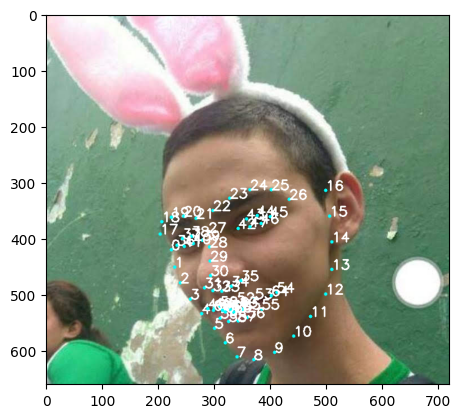

In [30]:
image4_detected = anotar_marcos_faciais(image4.copy(), marcos4)
showImg(cvt2RGB(image4_detected))

Determine and visualize the eye opening

Left eye

In [31]:
def get_olhos(marcos, OLHOS):
    olhos = []
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            if(idx in OLHOS):
                olhos.append((ponto[0,0], ponto[0,1]))
                
    return olhos

In [32]:
olho_esquerdo = get_olhos(marcos4, OLHO_ESQUERDO)
print(olho_esquerdo)
print(f"Razão: {aspecto_razao_olhos(olho_esquerdo)}")

[(342, 382), (357, 365), (376, 359), (399, 361), (383, 373), (363, 379)]
Razão: 0.25420885538781685


right eye

In [33]:
olho_direito = get_olhos(marcos4, OLHO_DIREITO)
print(olho_direito)
print(f"Razão: {aspecto_razao_olhos(olho_direito)}")

[(233, 412), (243, 400), (259, 396), (278, 403), (262, 409), (246, 414)]
Razão: 0.3013595179499054


# Challenges

Get the mouth opening, using the following function:
```Python
def aspecto_razao_boca(pontos_boca_in):
    pontos_boca = np.array(pontos_boca_in)
    a = dist.euclidean(pontos_boca[3], pontos_boca[9])
    b = dist.euclidean(pontos_boca[2], pontos_boca[10])
    c = dist.euclidean(pontos_boca[4], pontos_boca[8])
    d = dist.euclidean(pontos_boca[0], pontos_boca[6])
    
    aspecto_razao = (a + b + c)/(3.0*d)
    
    return aspecto_razao
```

Draw a convex shell on the mouth and eyes using the function
```Python
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco)
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem
```

Add these functions in Cameo

In [1]:
import cameo
c = cameo.Cameo()
c.run_with_points()